In [78]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

In [80]:
data = pd.read_csv("Smartphone_Behavior_Data.csv")
data = data.dropna()
data

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


In [81]:
data.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [82]:
corr = data.corr(numeric_only = True)
corr

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
User_ID,1.000000,-0.028576,-0.010570,0.020941,-0.001214,-0.002608,0.002207,-0.003514
Age,-0.028576,1.000000,-0.003319,-0.017639,-0.002081,-0.008324,0.005848,-0.012969
Total_App_Usage_Hours,-0.010570,-0.003319,1.000000,0.002948,0.041493,0.019330,-0.009983,-0.067770
Daily_Screen_Time_Hours,0.020941,-0.017639,0.002948,1.000000,0.016835,0.031773,0.033206,-0.012984
Number_of_Apps_Used,-0.001214,-0.002081,0.041493,0.016835,1.000000,0.017789,-0.007814,0.019468
Social_Media_Usage_Hours,-0.002608,-0.008324,0.019330,0.031773,0.017789,1.000000,-0.076456,0.006217
Productivity_App_Usage_Hours,0.002207,0.005848,-0.009983,0.033206,-0.007814,-0.076456,1.000000,0.027217
Gaming_App_Usage_Hours,-0.003514,-0.012969,-0.067770,-0.012984,0.019468,0.006217,0.027217,1.000000


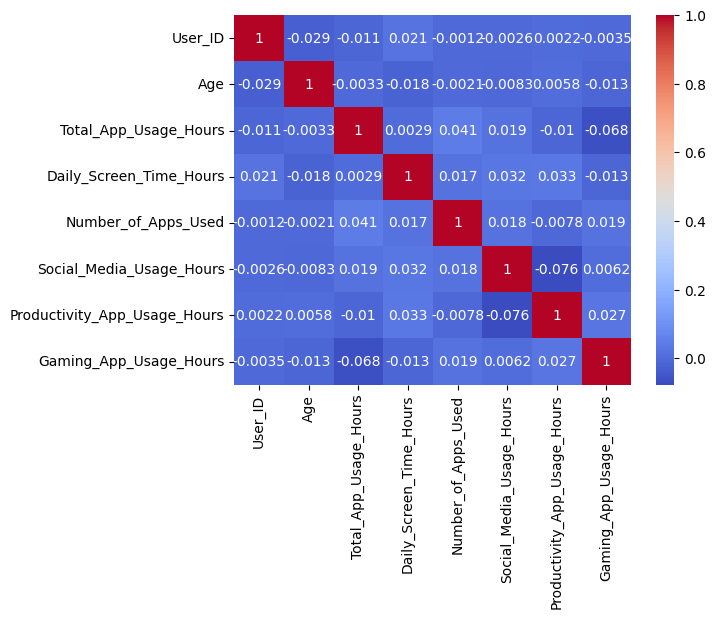

In [83]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [84]:
social = data.Social_Media_Usage_Hours
product = data.Productivity_App_Usage_Hours

In [85]:
linear_model = scipy.stats.linregress(social, product)
slope = linear_model.slope
intercept = linear_model.intercept
linear_fit = social*slope+intercept

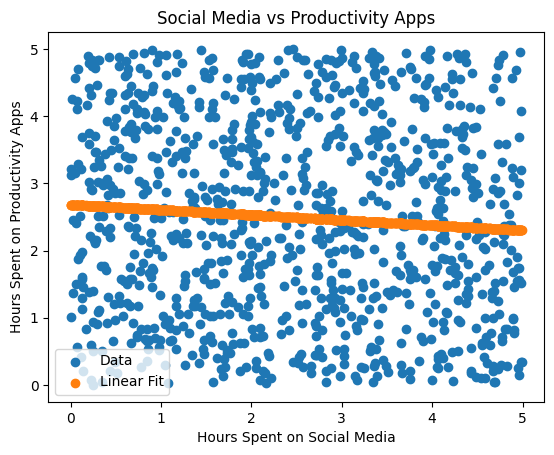

In [86]:
plt.scatter(social, product, label="Data")
plt.scatter(social, linear_fit, label="Linear Fit")
plt.xlabel("Hours Spent on Social Media")
plt.ylabel("Hours Spent on Productivity Apps")
plt.title("Social Media vs Productivity Apps")
plt.legend()

In [87]:
gender = data.Gender
gaming = data.Gaming_App_Usage_Hours

In [88]:
male_data = data[data['Gender']=='Male']

In [89]:
male_data['Gaming_App_Usage_Hours'].median()

np.float64(2.54)

In [90]:
female_data=data[data['Gender']=='Female']
female_data['Gaming_App_Usage_Hours'].median()

np.float64(2.36)

In [91]:
male_data['Gaming_App_Usage_Hours'].mean()

np.float64(2.4647195357833653)

In [92]:
female_data['Gaming_App_Usage_Hours'].mean()

np.float64(2.486853002070393)

In [93]:
female_data.Gaming_App_Usage_Hours.max()

np.float64(4.99)

In [94]:
male_data.Gaming_App_Usage_Hours.max()

np.float64(5.0)

In [95]:
female_data.Gaming_App_Usage_Hours.min()

np.float64(0.02)

In [96]:
male_data.Gaming_App_Usage_Hours.min()

np.float64(0.01)

In [97]:
# Males have a slightly higher average of gaming app hours 

In [98]:
apps_used = data.Total_App_Usage_Hours
number_apps = data.Number_of_Apps_Used 

In [99]:
gender_gaming = pd.crosstab(data['Gaming_App_Usage_Hours'], data['Gender'])
print(gender_gaming)

Gender                  Female  Male
Gaming_App_Usage_Hours              
0.01                         0     1
0.02                         1     1
0.03                         1     0
0.04                         3     0
0.05                         0     3
...                        ...   ...
4.96                         1     0
4.97                         1     0
4.98                         0     1
4.99                         1     0
5.00                         0     2

[443 rows x 2 columns]


In [100]:
c, p, dof, expected = scipy.stats.chi2_contingency(gender_gaming)
print("The P-Value is:", p)

The P-Value is: 0.11242041475810488


In [101]:
# The p-value above 0.05, which means that data is not significant and therefor is not 
# A statistical connection between gender and gaming hours 

In [102]:
gaming_time = data.Gaming_App_Usage_Hours

Text(0.5, 1.0, 'Hours Spent on Gaming Apps by Gender')

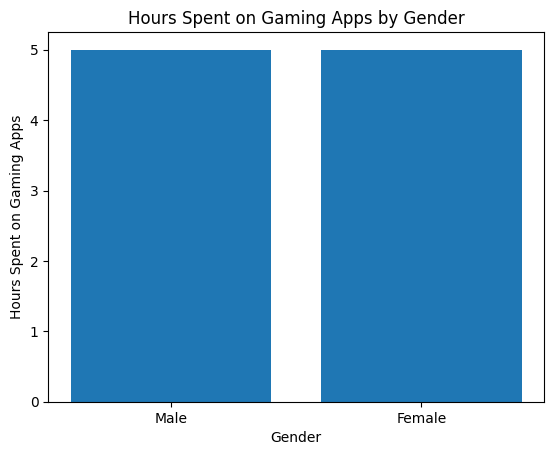

In [103]:
plt.bar(gender, gaming_time)
plt.ylabel('Hours Spent on Gaming Apps')
plt.xlabel('Gender')
plt.title('Hours Spent on Gaming Apps by Gender')

<BarContainer object of 1000 artists>

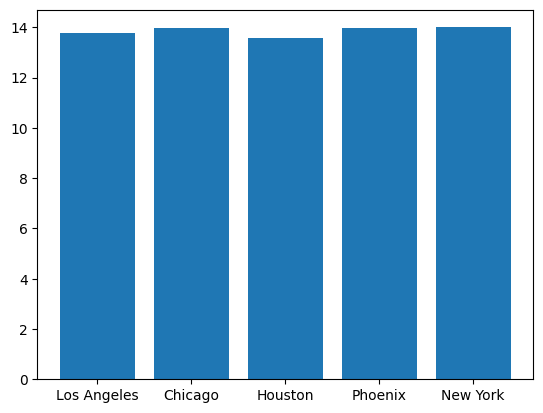

In [104]:
location = data.Location
screen_time = data.Daily_Screen_Time_Hours
plt.bar(location, screen_time)

In [105]:
location_screen = pd.crosstab(location, screen_time)
c, p, dof, expected = scipy.stats.chi2_contingency(location_screen)
print(p)

0.462878616997189


In [106]:
old = []
young = []
age = data["Age"]

In [107]:
for i in age:
    if i < 40:
        young.append(i)

In [108]:
print(young)

[32, 25, 38, 36, 28, 28, 20, 39, 19, 19, 38, 29, 39, 33, 32, 20, 24, 38, 26, 35, 21, 31, 26, 19, 37, 24, 25, 31, 34, 21, 19, 23, 21, 35, 27, 31, 32, 25, 31, 38, 33, 35, 32, 18, 24, 26, 18, 25, 28, 34, 25, 22, 24, 26, 25, 29, 39, 18, 31, 20, 18, 22, 31, 26, 32, 32, 30, 21, 32, 30, 24, 39, 19, 23, 37, 28, 18, 30, 20, 23, 25, 26, 32, 29, 19, 20, 34, 19, 19, 18, 36, 19, 23, 21, 28, 34, 22, 23, 39, 28, 33, 26, 23, 33, 20, 37, 36, 20, 36, 37, 24, 35, 18, 28, 24, 33, 19, 18, 29, 22, 26, 36, 33, 20, 37, 28, 25, 37, 35, 35, 19, 33, 21, 31, 38, 37, 25, 24, 20, 34, 29, 39, 39, 25, 38, 22, 36, 21, 34, 23, 38, 20, 35, 20, 39, 19, 19, 34, 26, 30, 24, 37, 18, 25, 33, 31, 29, 32, 19, 39, 39, 39, 23, 32, 25, 22, 21, 23, 33, 30, 36, 34, 36, 26, 29, 18, 18, 18, 33, 22, 39, 20, 29, 33, 39, 31, 22, 22, 29, 33, 38, 27, 22, 27, 36, 18, 22, 21, 33, 33, 19, 37, 29, 29, 20, 18, 27, 30, 29, 19, 34, 25, 27, 24, 21, 28, 38, 27, 26, 35, 29, 30, 34, 37, 39, 30, 36, 29, 36, 29, 26, 24, 31, 36, 33, 22, 29, 38, 33, 31,

In [109]:
for j in age:
    if j >= 40:
        old.append(j)

In [110]:
print(old)

[56, 46, 56, 40, 41, 53, 57, 41, 41, 47, 55, 50, 42, 44, 59, 45, 54, 56, 42, 43, 45, 52, 53, 57, 59, 46, 43, 51, 53, 48, 40, 57, 41, 43, 42, 58, 46, 42, 41, 41, 52, 52, 50, 59, 56, 58, 45, 51, 50, 40, 41, 54, 52, 57, 44, 52, 52, 54, 43, 56, 44, 43, 59, 49, 56, 49, 47, 54, 40, 56, 46, 53, 49, 45, 59, 45, 45, 47, 45, 42, 56, 50, 44, 58, 56, 44, 54, 50, 59, 41, 49, 49, 41, 58, 56, 54, 45, 40, 54, 49, 50, 43, 49, 49, 55, 41, 51, 50, 46, 53, 43, 49, 58, 50, 57, 56, 57, 45, 42, 40, 48, 47, 59, 52, 43, 54, 49, 58, 52, 41, 50, 41, 53, 55, 57, 52, 42, 52, 42, 46, 52, 58, 53, 50, 50, 50, 47, 55, 55, 44, 44, 51, 47, 50, 45, 50, 52, 45, 47, 46, 52, 58, 54, 41, 46, 48, 52, 50, 49, 40, 50, 42, 59, 48, 57, 41, 49, 40, 44, 59, 43, 57, 50, 56, 46, 59, 43, 52, 42, 41, 53, 40, 45, 51, 49, 40, 42, 59, 54, 50, 56, 49, 47, 52, 57, 59, 47, 45, 43, 54, 43, 40, 51, 49, 42, 57, 56, 46, 43, 54, 46, 45, 47, 43, 43, 56, 53, 50, 47, 54, 40, 53, 51, 48, 49, 41, 45, 49, 44, 41, 52, 50, 50, 54, 50, 57, 46, 48, 52, 40,

In [111]:
young_df = data.loc[data['Age'] <= 25]

In [112]:
middle_df = data.loc[(data['Age'] >= 26) & (data['Age'] <= 40)]

In [113]:
old_df = data.loc[data['Age'] >= 41]

In [114]:
young_df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
14,15,20,Male,4.94,7.11,15,2.70,0.45,4.76,Los Angeles
16,17,19,Female,11.75,7.17,5,2.16,0.03,3.16,Los Angeles
20,21,19,Female,1.45,1.64,27,4.22,4.63,0.50,New York
31,32,20,Male,7.88,4.70,27,1.98,4.58,0.42,New York
...,...,...,...,...,...,...,...,...,...,...
984,985,21,Male,6.11,9.83,18,2.98,4.07,2.89,Phoenix
986,987,19,Female,4.75,13.37,15,1.91,1.05,2.52,New York
988,989,22,Male,2.88,8.95,15,0.98,3.14,3.10,Phoenix
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


In [115]:
young_df.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,507.632653,21.367347,6.617908,8.053316,16.377551,2.567755,2.443010,2.464235
std,300.675492,2.315556,3.170231,3.640850,7.880538,1.488153,1.401248,1.509810
min,4.000000,18.000000,1.020000,1.010000,3.000000,0.000000,0.000000,0.010000
25%,228.250000,19.000000,3.940000,5.352500,10.000000,1.207500,1.347500,1.197500
50%,533.500000,21.000000,6.895000,8.435000,16.000000,2.660000,2.370000,2.420000
75%,771.250000,23.000000,9.300000,11.170000,24.000000,3.897500,3.477500,3.945000
max,1000.000000,25.000000,11.930000,14.000000,29.000000,4.960000,5.000000,4.970000


In [116]:
middle_df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix
...,...,...,...,...,...,...,...,...,...,...
985,986,39,Male,2.51,11.05,6,4.07,2.94,4.79,Phoenix
987,988,27,Female,2.81,11.09,28,0.66,1.18,0.41,Chicago
989,990,27,Male,11.43,12.15,4,1.19,4.15,1.70,Phoenix
992,993,30,Female,8.04,12.51,10,3.00,4.34,0.96,New York


In [117]:
middle_df.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,510.259259,33.037037,6.321543,7.434074,17.138889,2.375000,2.475988,2.507191
std,281.680408,4.368320,3.126731,3.810598,7.365040,1.428365,1.392473,1.409305
min,3.000000,26.000000,1.000000,1.030000,3.000000,0.030000,0.070000,0.050000
25%,277.500000,29.000000,3.590000,4.005000,11.000000,1.107500,1.257500,1.332500
50%,525.500000,33.000000,6.245000,7.375000,17.500000,2.345000,2.465000,2.500000
75%,746.250000,37.000000,8.912500,10.880000,23.000000,3.462500,3.585000,3.725000
max,997.000000,40.000000,11.970000,13.990000,29.000000,4.960000,4.990000,5.000000


In [118]:
old_df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago
10,11,41,Female,6.88,7.11,21,3.66,1.93,2.32,Chicago
11,12,53,Female,10.71,6.86,21,4.12,0.40,1.23,Phoenix
...,...,...,...,...,...,...,...,...,...,...
991,992,55,Male,9.68,6.31,24,3.21,1.29,2.17,New York
993,994,48,Female,8.44,3.88,26,3.48,3.35,0.96,Chicago
994,995,53,Male,2.45,10.29,17,1.81,2.24,3.84,Phoenix
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles


In [119]:
old_df.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,491.000000,49.693750,6.375792,7.727542,16.425000,2.465729,2.529625,2.458521
std,288.947099,5.381865,3.128536,3.671992,7.680099,1.426488,1.495228,1.455625
min,1.000000,41.000000,1.030000,1.030000,3.000000,0.000000,0.030000,0.040000
25%,246.750000,45.000000,3.532500,4.612500,10.000000,1.290000,1.205000,1.167500
50%,476.000000,50.000000,6.595000,7.895000,17.000000,2.465000,2.490000,2.455000
75%,730.750000,54.000000,9.095000,10.777500,23.000000,3.640000,3.842500,3.722500
max,998.000000,59.000000,11.950000,13.990000,29.000000,4.990000,4.990000,5.000000


In [120]:
young_screen_time = young_df.Daily_Screen_Time_Hours
middle_screen_time = middle_df.Daily_Screen_Time_Hours
old_screen_time = old_df.Daily_Screen_Time_Hours

In [121]:
young_social = young_df.Social_Media_Usage_Hours
middle_social = middle_df.Social_Media_Usage_Hours
old_social = old_df.Social_Media_Usage_Hours

In [122]:
young_product = young_df.Productivity_App_Usage_Hours
middle_product = middle_df.Productivity_App_Usage_Hours
old_product = old_df.Productivity_App_Usage_Hours

In [123]:
young_gaming = young_df.Gaming_App_Usage_Hours
middle_gaming = middle_df.Gaming_App_Usage_Hours
old_gaming = middle_df.Gaming_App_Usage_Hours

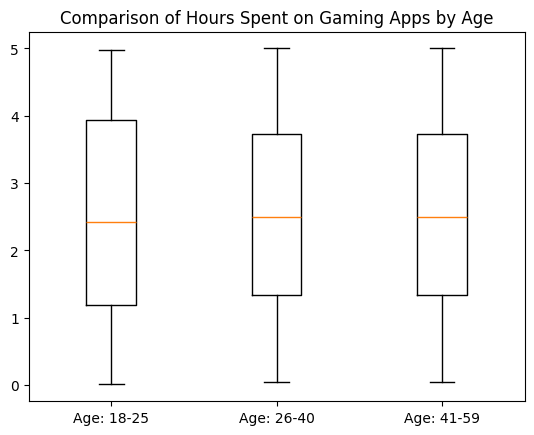

In [124]:
fig, ax = plt.subplots()
ax.boxplot([young_gaming, middle_gaming, old_gaming], tick_labels = ['Age: 18-25', 'Age: 26-40', 'Age: 41-59'])
ax.set_title('Comparison of Hours Spent on Gaming Apps by Age')
plt.show()

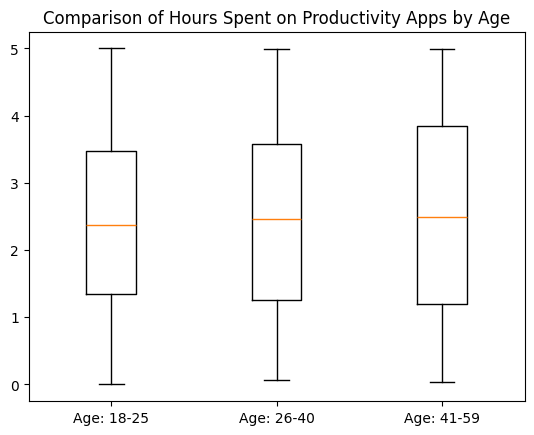

In [125]:
fig, ax = plt.subplots()
ax.boxplot([young_product, middle_product, old_product], tick_labels = ['Age: 18-25', 'Age: 26-40', 'Age: 41-59'])
ax.set_title('Comparison of Hours Spent on Productivity Apps by Age')
plt.show()

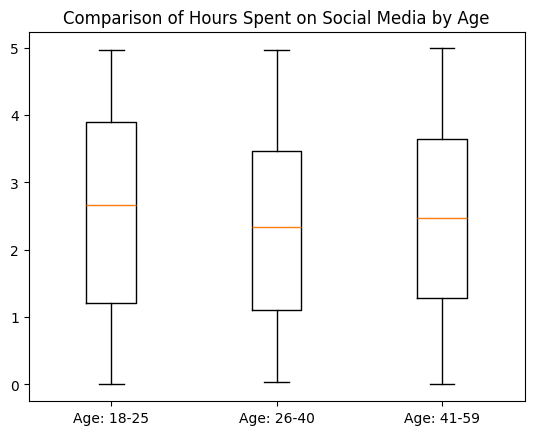

<Figure size 640x480 with 0 Axes>

In [126]:
fig, ax = plt.subplots()
ax.boxplot([young_social, middle_social, old_social], tick_labels =['Age: 18-25', 'Age: 26-40', 'Age: 41-59'])
ax.set_title('Comparison of Hours Spent on Social Media by Age')
plt.show()
plt.savefig('Final_Project_Social.png')

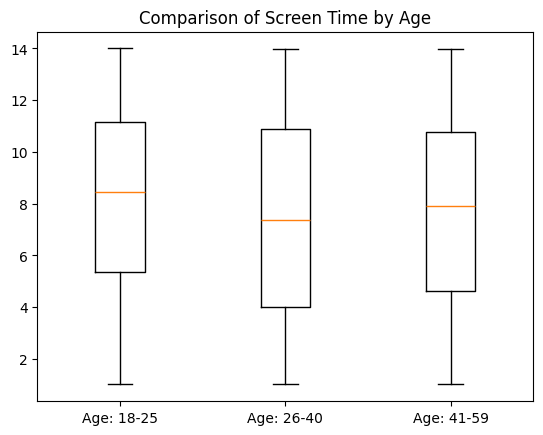

<Figure size 640x480 with 0 Axes>

In [127]:
fig, ax = plt.subplots() 
ax.boxplot([young_screen_time, middle_screen_time, old_screen_time], tick_labels = ['Age: 18-25', 'Age: 26-40', 'Age: 41-59'])
ax.set_title('Comparison of Screen Time by Age')
plt.show()
plt.savefig('Final_project_Screen_Time.png')

In [128]:
age_time = pd.crosstab(data.Age, data.Daily_Screen_Time_Hours)
print(age_time)

Daily_Screen_Time_Hours  1.01   1.03   1.04   1.07   1.08   1.09   1.10   \
Age                                                                        
18                           0      0      0      0      0      0      0   
19                           1      0      0      0      0      0      0   
20                           0      0      0      0      0      0      0   
21                           0      1      1      0      0      0      0   
22                           0      0      0      0      0      0      0   
23                           0      0      0      0      0      0      0   
24                           0      0      0      0      0      0      0   
25                           0      0      0      0      0      0      0   
26                           0      0      0      0      0      1      1   
27                           0      0      0      0      0      0      0   
28                           0      1      0      0      0      0      0   
29          

In [129]:
c, p, dof, expected = scipy.stats.chi2_contingency(age_time)
print(p)

0.4287944496784728


In [130]:
age_usage = pd.crosstab(data.Age, data.Total_App_Usage_Hours)
print(age_usage)

Total_App_Usage_Hours  1.00   1.01   1.02   1.03   1.04   1.08   1.10   1.11   \
Age                                                                             
18                         0      0      0      0      0      0      0      0   
19                         0      0      0      0      0      0      0      0   
20                         0      0      0      0      0      0      0      0   
21                         0      0      0      0      0      0      0      0   
22                         0      0      0      0      0      0      0      0   
23                         0      0      1      0      0      0      0      0   
24                         0      0      0      0      0      0      0      0   
25                         0      0      0      0      0      0      0      0   
26                         0      0      0      0      0      0      0      0   
27                         0      0      0      0      1      0      0      0   
28                         0

In [131]:
c, p, dof, expected = scipy.stats.chi2_contingency(age_usage)
print(p)

0.31157491625813544


In [132]:
# Data is not statistically significant 

In [133]:
location_usage = pd.crosstab(data.Location, data.Total_App_Usage_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(location_usage)
print(p)

0.7521400071941245


In [134]:
location_daily = pd.crosstab(data.Location, data.Daily_Screen_Time_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(location_daily)
print(p)

0.462878616997189


In [135]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location'],
      dtype='object')

In [136]:
gender_ta = pd.crosstab(data.Gender, data.Total_App_Usage_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_ta)
print(p)

0.5172577787535384


In [137]:
gender_daily = pd.crosstab(data.Gender, data.Daily_Screen_Time_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_daily)
print(p)

0.19622275797708968


In [138]:
gender_used = pd.crosstab(data.Gender, data.Number_of_Apps_Used)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_used)
print(p)

0.9575570057972077


In [139]:
gender_social = pd.crosstab(data.Gender, data.Social_Media_Usage_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_social)
print(p)

0.25728639991388724


In [140]:
gender_product = pd.crosstab(data.Gender, data.Productivity_App_Usage_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_social)
print(p)

0.25728639991388724


In [141]:
gender_gaming = pd.crosstab(data.Gender, data.Gaming_App_Usage_Hours)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_gaming)
print(p)

0.11242041475810488


In [142]:
gender_location = pd.crosstab(data.Gender, data.Location)
c, p, dof, expected = scipy.stats.chi2_contingency(gender_gaming)
print(p)

0.11242041475810488


In [143]:
x = data.Age

In [144]:
def func(x):
    if x < 30:
        return 1 
    if x >= 30: 
        return 2

In [145]:
# Train Test Split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay

In [146]:
data.columns

Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location'],
      dtype='object')

In [147]:
data["Age Class"] = data["Age"].map(lambda x : func(x))

In [148]:
X = data[["Social_Media_Usage_Hours", "Gaming_App_Usage_Hours", "Daily_Screen_Time_Hours"]]
y = data["Age Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

In [149]:
print(X_train)
y.nunique()

     Social_Media_Usage_Hours  Gaming_App_Usage_Hours  Daily_Screen_Time_Hours
716                      0.99                    2.67                    10.29
462                      4.00                    1.37                     9.38
685                      4.30                    2.10                     2.85
923                      4.78                    2.13                    12.75
352                      0.28                    3.22                     1.55
..                        ...                     ...                      ...
896                      0.34                    1.78                    13.01
303                      2.89                    1.49                     6.41
608                      2.84                    2.05                     5.74
861                      0.27                    4.97                     4.29
92                       1.87                    0.25                     3.81

[800 rows x 3 columns]


2

In [150]:
# Train the Machine Learning

In [151]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [152]:
prediction = classifier.predict(X_test)
print(prediction[0:100])

[2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [153]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy*100)

67.5


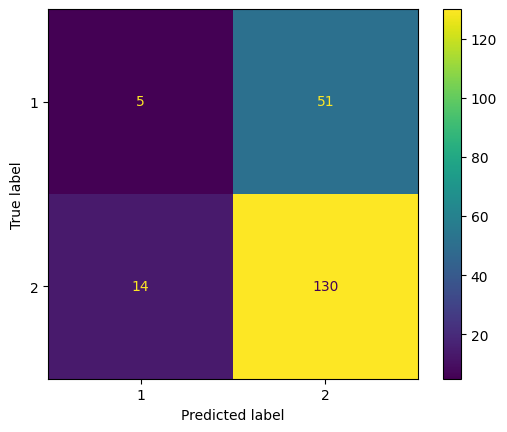

In [154]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

In [159]:
freq_table = pd.crosstab(data['Location'], 'frequency')
freq_table

col_0,frequency
Location,
Chicago,192
Houston,181
Los Angeles,185
New York,243
Phoenix,199


In [160]:
freq_table_2 = pd.crosstab(data['Gender'], 'frequency')
freq_table_2

col_0,frequency
Gender,
Female,483
Male,517
